# **OVERVIEW**

##  Nguyên Nhân Ra Đời

- **Linked List**, ra đời nhằm khắc phục những **hạn chế của cấu trúc dữ liệu `array`**, bao gồm:

  - **Không linh hoạt trong cấp phát bộ nhớ**:  
      Khi khởi tạo, array cần xác định kích thước trước. Nếu cấp phát lớn mà chỉ sử dụng một phần nhỏ ➝ **gây lãng phí bộ nhớ**.  
      Nếu cấp phát quá nhỏ ➝ không đủ dùng ➝ phải tạo array mới với kích thước lớn hơn và sao chép lại toàn bộ dữ liệu.
  
  - **Không tối ưu khi chèn hoặc xóa**:  
      Việc thêm hoặc xóa phần tử tại vị trí bất kỳ trong array yêu cầu **dịch chuyển toàn bộ các phần tử phía sau**, làm tăng độ phức tạp thời gian lên `O(n)`.

  - **Yêu cầu vùng bộ nhớ liên tục**:  
      Array (kể cả Dynamic Array) đều cần bộ nhớ liên tiếp, điều này gây khó khăn trong môi trường bị **phân mảnh bộ nhớ (fragmented memory)**.




##  Định Nghĩa & Đặc Điểm

- **Linked List** là một cấu trúc dữ liệu dạng **danh sách móc nối**, nơi mỗi phần tử gọi là một `node` và chứa hai thành phần:
  - `data`: giá trị của node.
  - `next`: con trỏ trỏ tới node tiếp theo trong danh sách.

- Có thể hình dung **Linked List** giống như một **đoàn tàu**, nơi mỗi `toa tàu` (node) được nối với toa kế tiếp thông qua một móc nối (`next` pointer).

###  Các loại Linked List phổ biến:

1. **Single Linked List**  (Trọng tâm của bài `notebook` này)
   - Mỗi node chỉ chứa một con trỏ `next`, trỏ tới node kế tiếp.
   
2. **Doubly Linked List**  
   - Mỗi node chứa hai con trỏ:  
     - `next` trỏ tới node kế tiếp  
     - `prev` trỏ ngược lại node trước đó  

3. **Circular Linked List**  
   - Node cuối cùng trong danh sách sẽ trỏ ngược lại node đầu tiên, tạo thành một vòng tròn khép kín.


## Ứng Dụng

- **Linked List** được sử dụng rộng rãi trong nhiều lĩnh vực, đặc biệt là:
  - Tổ chức và quản lý **bộ nhớ động**
  - Xây dựng các cấu trúc dữ liệu như `Stack`, `Queue`, `Graph`
  - Hệ điều hành: quản lý tiến trình, quản lý bộ nhớ ảo, các bảng phân trang, v.v.

> 📌 Ghi chú: Các cấu trúc dữ liệu như **Stack** và **Queue** sẽ được trình bày chi tiết hơn trong các notebook tiếp theo.

---

[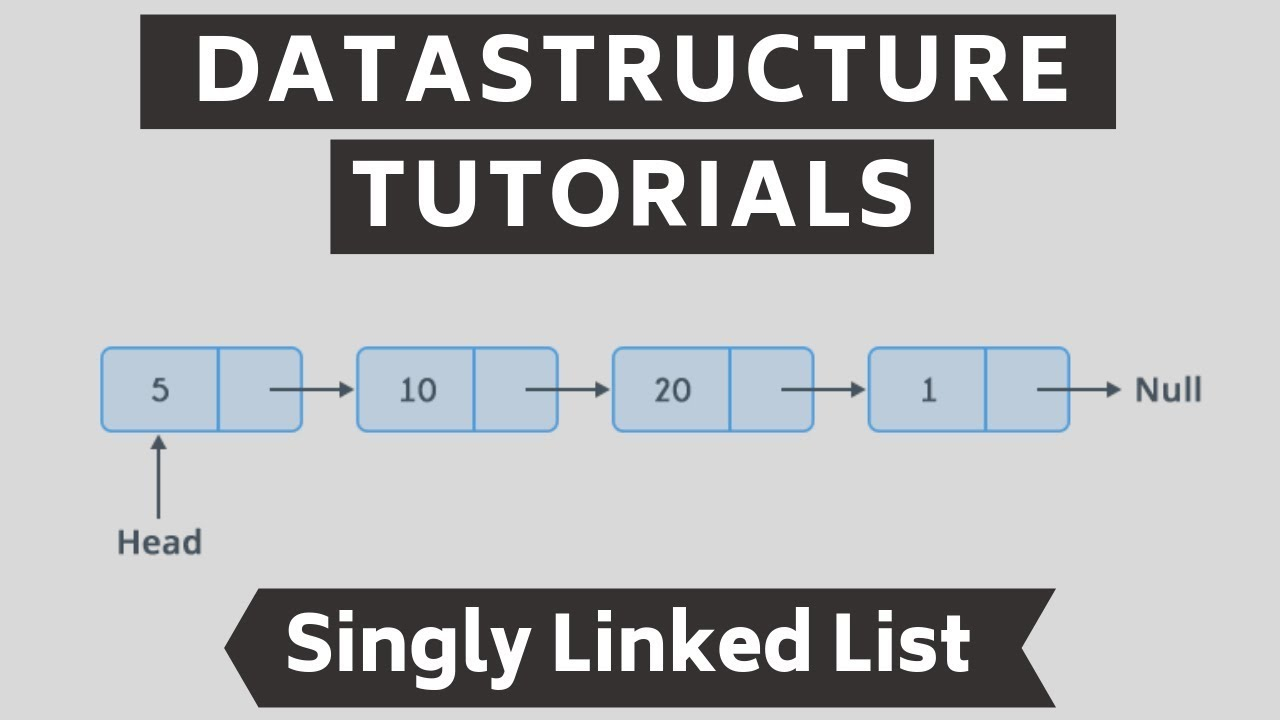](https://www.youtube.com/watch?v=HB7TcYklBHY)

# **THAO TÁC**

##  Thêm

Việc thêm một node vào `Single Linked List` (vì trọng tâm là cấu trúc này, nên từ đây về sau mình sẽ gọi tắt là `Linked List`) được chia thành **3 trường hợp**:

1. **Thêm vào đầu danh sách**
   - Chỉ cần tạo một `node mới`, sau đó cho con trỏ `next` của node này trỏ đến `head` hiện tại.  
   - Cuối cùng, cập nhật lại `head` chính là node mới vừa thêm.
   - Thao tác này có độ phức tạp thời gian `O(1)`.
   ```python
    new_node = Node(val)
    # Nếu chèn vào đầu
    if index <= 0:
      new_node.next = self.head
      self.head = new_node
      return
   ```
2. **Thêm vào cuối danh sách**
   - Duyệt từ `head` đến node cuối cùng bằng một con trỏ tạm (`temp`).
   - Khi đến node cuối (có `next` là `None`), ta gán `temp.next = node_mới`.
   - Độ phức tạp thời gian là `O(n)` vì phải duyệt đến cuối.

3. **Thêm vào vị trí k**
   - Sử dụng hai con trỏ `prev` và `cur`:  
     - `cur` sẽ di chuyển tới vị trí thứ `k`,  
     - `prev` đứng ngay trước `cur` (`prev.next == cur`).
   - Gán `prev.next = node_mới` và `node_mới.next = cur`.
   - Độ phức tạp thời gian `O(k)` trong trường hợp xấu nhất.


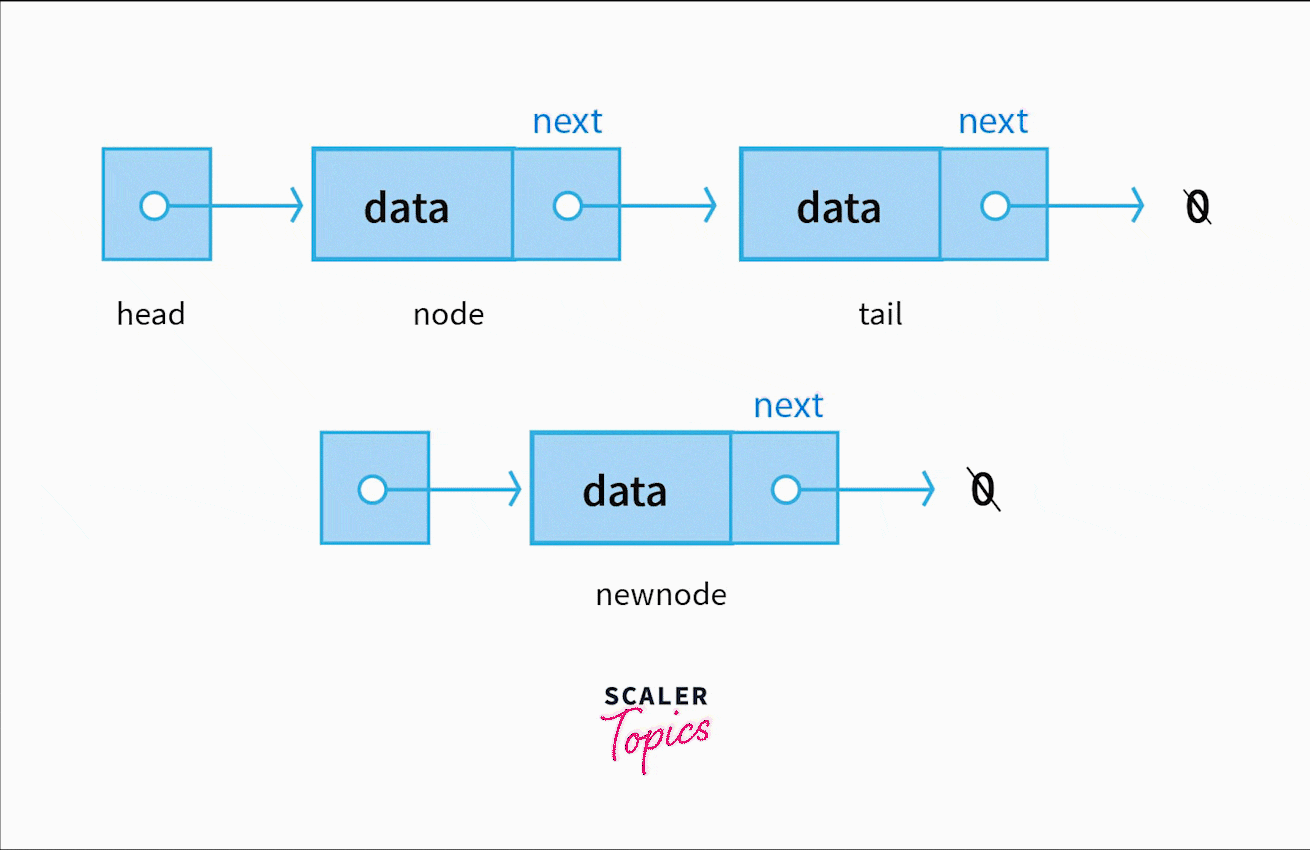

## Xóa

Tương tự như thao tác thêm, xóa một node trong `Linked List` cũng được chia thành **2 trường hợp chính**:

1. **Xóa node đầu danh sách**
   - Chỉ cần cập nhật `head` sang node kế tiếp:  
     ```python
     head = head.next
     ```
   - Thao tác này rất nhanh, thời gian `O(1)`.

2. **Xóa node tại vị trí k**
   - Dùng hai con trỏ `prev` và `cur`:  
     - `cur` trỏ tới node tại vị trí cần xóa,  
     - `prev` đứng ngay trước `cur`.
   - Cập nhật liên kết: `prev.next = cur.next` ➝ node tại vị trí `k` bị loại bỏ khỏi danh sách.
   - Độ phức tạp thời gian `O(k)`.


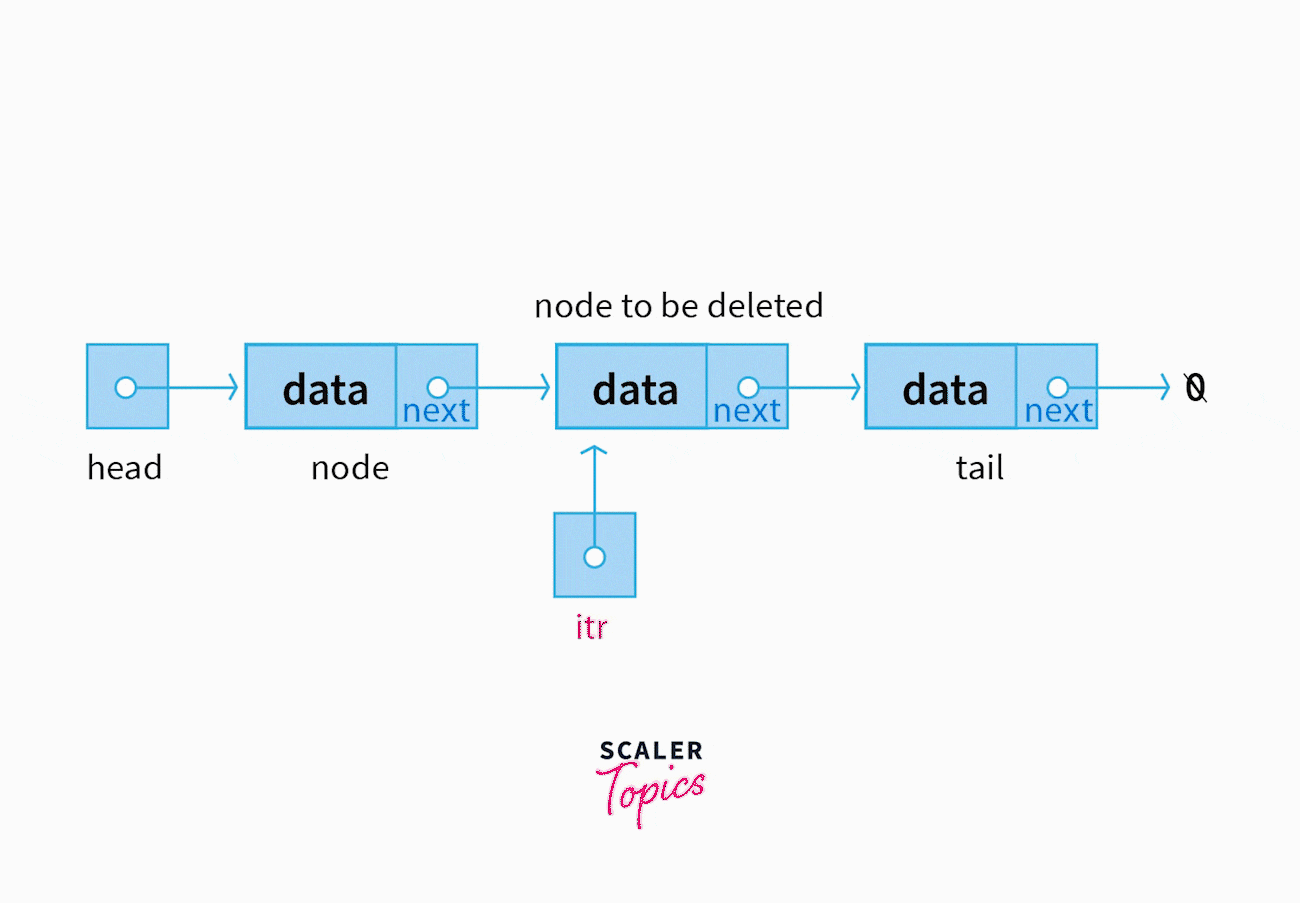


# **CODE**

- Trong bài `notebook` này, mình sẽ tiến hành **xây dựng lại cấu trúc `Single Linked List` từ đầu** `(from scratch)` bằng ngôn ngữ **Python** mà không sử dụng bất kỳ thư viện hỗ trợ sẵn nào.
- Mỗi hàm trong đoạn code đều được **comment giải thích chi tiết** để giúp các bạn dễ dàng theo dõi và hiểu được chức năng của từng phần.


> 💬 **Lưu ý**:  
> Vì kiến thức còn hạn chế, bài viết này mang tính chất **tham khảo**. Nếu có điều gì thiếu sót hoặc chưa hợp lý, mình rất mong nhận được sự góp ý từ mọi người để hoàn thiện hơn.  
> **Xin chân thành cảm ơn!** 😌😌😌


In [ ]:
# Khởi tạo node cơ bản
class Node:
  def __init__(self, val):
    self.val = val
    self.next = None

In [ ]:
# Khởi tạo Linklist
class LinkList:
  def __init__(self):
    self.head = None
    self.length = 0

  # Hàm kiễm tra LinkList hiện tại có đang rỗng
  def empty(self) -> bool:
     return self.head is None

  # Hàm dùng để đổi giá trị
  def swap(self, node_a: Node, node_b: Node):
    tmp = node_a.val
    node_a.val = node_b.val
    node_b.val = tmp

  # Hàm tìm kiếm trong
  def sreach(self, val: int) -> int:
    tmp = self.head
    index = 0
    while tmp != None:
      if tmp.val == val:
        return index
      tmp = tmp.next
    return -1

  # Hàm thêm vào đuôi
  def append(self, val: int):
     new_node = Node(val)
     if self.empty():
        self.head = new_node
     else:
        tmp_head = self.head
        while tmp_head.next is not None:
          tmp_head = tmp_head.next
        tmp_head.next = new_node

     self.length += 1

  # Hàm thêm bằng cách chèn
  def insert(self, index: int , val: int):

    new_node = Node(val)

    self.length += 1

    # Nếu chèn vào đầu
    if index <= 0:
      new_node.next = self.head
      self.head = new_node
      return

    # Nếu chèn vào vị trí khác
    cur = self.head
    prev = None
    while(index > 0 and cur != None):
      prev = cur
      cur = cur.next
      index -= 1

    prev.next = new_node
    new_node.next = cur

  # Hàm xóa
  def delete(self, val: int) -> bool:
      if self.empty() or self.sreach(val) == -1:
        return False

      self.length -= 1

      # Xóa node đầu
      if self.head.val == val:
        self.head = self.head.next
        return True

      # Xóa các node khác
      curr = self.head
      prev = None
      while curr.val != val and curr != None:
          prev = curr
          curr = curr.next

      prev.next = curr.next
      return True

  # Hàm sắp xếp trong link list (so sánh các cặp nghịch thế)
  def sort(self, reverse: bool = False):
    change = 0
    tmp = self.head
    while tmp.next != None:
      if reverse:
        if tmp.val < tmp.next .val:
          self.swap(tmp, tmp.next)
          change += 1
      else:
        if tmp.val > tmp.next .val:
          self.swap(tmp, tmp.next)
          change += 1

      tmp = tmp.next

    if change != 0:
      self.sort(reverse)


  # Hàm in
  def toString(self):
    tmp_head = self.head
    while(tmp_head is not None):
      print(tmp_head.val, end="")
      if tmp_head.next is not None:
        print(" ---> ", end="")
      tmp_head = tmp_head.next
    print()



In [ ]:
# Test case check chức năng thêm
myList = LinkList()
myList.append(5)
myList.append(3)
myList.append(2)
myList.append(7)
myList.toString()

5 ---> 3 ---> 2 ---> 7


In [ ]:
# Test case check chức năng sắp xếp
myList.sort()
myList.toString()

2 ---> 3 ---> 5 ---> 7


In [ ]:
# Test case check chức năng xóa
myList.delete(2)
myList.delete(4)
myList.toString()

3 ---> 5 ---> 7


In [ ]:
# Test case check chức năng insert
myList.insert(5,100)
myList.insert(-5,200)
myList.toString()
print(f"length of list: {myList.length}")

200 ---> 3 ---> 5 ---> 7 ---> 100
length of list: 5


 # **MỘT SỐ BÀI TẬP RÈN LUYỆN VỀ SINGLE LINK LIST**

 - Các bài tập Link list dưới đây được tôi lấy từ các bài tập trên `LEETCODE`, tôi tổng hợp được một số bài tập có thể xem là `Kinh điển` và được nhiều `nhà tuyển` dụng **phòng vấn**.
 ---

## [LEETCODE 148. Sort Linked List ](https://leetcode.com/problems/insertion-sort-list/description/)  **`Medium`**

- Given the head of a linked list, return the list after sorting it in ascending order.

In [ ]:
### Trong code trên hàm sort() tôi viết sử dụng thuật toán về cặp nghịch thế do đó độ phước tạp cao O(n^2)
### với lại đề bài này yêu cầu thuật toán có độ phức tạp O(nlogn) nên sử dụng code ở trên không phù hợp

### Có 2 cách tiếp cận
### CÁCH 1: Đưa giá trị của Link list vào mảng, tiếp theo ra sắp xếp lại trên mảng (hàm sorted có độ phức tạp nlogn) rồi sau đó
### gán giá trị từ arr vào lại Link list

### CÁCH 2: Thuần Link list. Chúng ta sẽ sử dụng merge sort để giải quyêt bài toán này, nhưng vấn đề là làm cách nào để tìm node giữa để
### có thể chia Link list làm 2 nữa --> ta sẽ sử dụng thuật toán Floyd’s Cycle Detection để tim middle node, còn thuật toán Floyd’s Cycle Detection
### cụ thể là gì tôi sẽ giải thích sau

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

### CÁCH 1:
class Solution:
    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        arr = []

        while head != None:
            arr.append(head.val)
            head = head.next


        arr = sorted(arr)

        result = None
        tmp = result

        for i in arr:
            node = ListNode(i)
            if result is None:
                result = node
                tmp = result
            else:
                tmp.next = node
                tmp = tmp.next

        return result


### CÁCH 2:

class Solution:
    def merge(self, l1 , l2):
        dummies = ListNode(0)
        cur = dummies
        while l1 != None and l2 != None:
            if l1.val < l2.val:
                cur.next = l1
                l1 = l1.next
            else:
                cur.next = l2
                l2 = l2.next

            cur = cur.next

        cur.next = l1 or l2
        return dummies.next

    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:

        # Chia để trị, nếu chỉ còn một phần từ trả về luôn khỏi cần chia tiếp
        if head is None or head.next is None:
            return head

        # Tìm middle node
        slow = head
        fast = head
        while fast != None and fast.next != None:
            slow = slow.next
            fast = fast.next.next

        # Tiến hành chia nữa trái và nữa phải
          # Trương hợp chỉ có 2 phần từ
        if head.next == slow:
            middle = slow
            head.next = None
        else:
            middle = slow.next
            slow.next = None

        # Tiếp tục chia để trị nữa trái và nữa phải cho đến khi đến khi chỉ còn 1 node duy nhất
        left = self.sortList(head)
        right = self.sortList(middle)

        return self.merge(left, right)

## [LEETCODE 147. Insertion Sort List](https://leetcode.com/problems/insertion-sort-list/description/) **`Medium`**

- Given the head of a singly linked list, sort the list using insertion sort, and return the sorted list's head.

The steps of the insertion sort algorithm:

Insertion sort iterates, consuming one input element each repetition and growing a sorted output list.
At each iteration, insertion sort removes one element from the input data, finds the location it belongs within the sorted list and inserts it there.
It repeats until no input elements remain.


In [ ]:
### Đề bài này yêu cầu chúng ta sử dụng thuật toán Insertion sort để tiến hành sort một link list
## Cách làm thì chúng ta sẽ làm đúng với chữ INSERTION ta sẽ tìm vị trí phù hợp rồi sau đó dùng hàm insert để thêm vào đúng vị trí

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def insertionSortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # # # Tạo một linklist dummies để có thể sử dụng index -1 như trong array
        dummies = ListNode(0)

        dummies.next = ListNode(head.val)

        cur = head.next

        # Di chuyển từ đầu dến cuối head xuất phát từ index = 1 của head
        while cur != None:

            tmp = dummies.next
            prev = dummies

            # Tìm vị trí cần chèn trong dummies
            while tmp != None and prev != None and cur.val > tmp.val :
                prev = tmp
                tmp = tmp.next

            # Tiến hành insertion
            new_node = ListNode(cur.val)
            prev.next = new_node
            new_node.next = tmp

            cur = cur.next

        return dummies.next



### Hoặc có thể sử dụng code này tối ưu hơn và hay hơn 😁😁😁

class Solution:
    def insertionSortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # # # Tạo một linklist dummies
        dummies = ListNode(0)

       # Di chuyển từ đầu đến cuối linklist head
        while head is not None:
            prev = dummies
            cur = head

            # Tìm kiếm vị trí phù hợp
            while prev.next is not None and cur.val > prev.next.val:
                prev = prev.next

            head = head.next

            cur.next = prev.next
            prev.next = cur

        return dummies.next

## [LEETCODE 206. Reverse Linked List](https://leetcode.com/problems/reverse-linked-list/description/) **`EASY`**
- Given the head of a singly linked list, reverse the list, and return the reversed list.


In [ ]:
### Đối với bài này chúng ta có nhiều cách giải quyết
### 1. Từ List xay dựng mảng rồi xây dựng ngược lại Link list từ phải sang trái của mảng bởi vì đề bài đã cho Link list đã được sort sẳng rồi
### 2. Xử lý thuần Link list bằng cách trỏ con trỏ của các phần tử ngược lại



class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

### CÁCH 1:
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # Tạo mảng để chứa giá trị của head
        mylist = []

        # Đưa giá trị của head vào mảng
        while head != None:
            mylist.append(head.val)
            head = head.next

        result = None
        tmp = result

        # Tiến hành tạo Link list với cách duyệt từ phải sang trái của mảng
        for i in range(len(mylist) - 1 , -1 , -1):
            new_node = ListNode(mylist[i])
            if result is None:
                result = new_node
                tmp = result
            else:
                tmp.next = new_node
                tmp = tmp.next

        return result


### CÁCH 2:
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head == None:
            return head

        prev = head
        next_node = head.next

        while next_node != None:
            cur = next_node
            next_node = next_node.next
            cur.next = prev
            head.next = next_node
            prev = cur

        return prev

## [LEETCODE 92. Reverse Linked List II](https://leetcode.com/problems/reverse-linked-list-ii/description/) **`Medium`**

- Given the head of a singly linked list and two integers left and right where left <= right, reverse the nodes of the list from position left to position right, and return the reversed list.

In [ ]:
### Bài này giông với bài trước đó những bị giới hạn với left và right
### Có nghĩa là chỉ Reverse Link List trong khoảng từ left dến right thôi
### Cách 1: Giống như cách 1 trên sử dụng mảng làm trung gian rồi thực hình reverse trên mảng rồi đưa vào Link list mới
### Cách 2: Thuần Link list


class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


### CÁCH 1:
class Solution:
    def reverseBetween(self, head: Optional[ListNode], left: int, right: int) -> Optional[ListNode]:
        # Tạo mảng để biến linklist thành mảng, do vị trí bắt đầu từ 1 nên thêm 1 phần tử
        arr = [0]

        # Duyệt linklist để biến nó thành mảng
        while head != None:
            arr.append(head.val)
            head = head.next

        # Thực hiện reverse trên đoạn left và right
        while right > left:
            tmp = arr[right]
            arr[right] = arr[left]
            arr[left] = tmp
            right -= 1
            left += 1

        result = None
        tmp = result

        # Từ mảng xây dựng lại linklist
        for i in range(len(arr)):
            if i == 0:
                continue
            node = ListNode(arr[i])
            if result is None:
                result = node
                tmp = result
            else:
                tmp.next = node
                tmp = tmp.next

        return result



### CÁCH 2: Cách làm này có vẻ hơi rườm rà và khó hiểu hơn, nhưng tôi sẽ cố gắng giải thích rõ ràng.

### Ý tưởng:
#### BƯỚC 1: Duyệt qua Linked List cho đến khi tìm được node BẮT ĐẦU CẦN ĐẢO NGƯỢC. Đồng thời, sử dụng một biến `prev` để lưu lại node đứng trước node này (nếu có).
#### BƯỚC 2: Truyền node bắt đầu cần đảo ngược đó vào hàm `reverse_helper`, cùng với số lượng phần tử cần đảo là `k = right - left`.
#### BƯỚC 3: Thực hiện đảo ngược `k` node đầu tiên được truyền vào trong hàm `reverse_helper`.
#### BƯỚC 4: Sau khi đảo xong, nối lại các phần:
# `prev.next = kết quả của reverse_helper` (nếu `prev` tồn tại)

### LƯU Ý:
# Thông thường khi đảo một Linked List, node đầu tiên sau khi đảo sẽ trỏ về `null`. Tuy nhiên, trong bài toán này,
## node đầu tiên (sau khi đảo ngược) phải trỏ về node thứ `k + 1` (tức node đứng sau đoạn cần đảo).
class Solution:

    ### Hàm reverse Link list cơ bản
    def reverse_helper(self, head , k):
        prev = head
        cur = head.next
        Next = None
        while cur != None and k > 0:
            Next = cur.next
            cur.next = prev
            prev = cur
            cur = Next
            k -= 1

        head.next = Next
        return prev

    def reverseBetween(self, head: Optional[ListNode], left: int, right: int) -> Optional[ListNode]:

        count = 1
        cur = head
        prev = None

        # Duyệt tới node cần đảo ngược
        while cur != None:
            # Tới node cần đảo ngước và thực hiện BƯỚC 2 và BƯỚC 3
            if count == left and right > left:
                result = self.reverse_helper(cur, right - left)
                # Nếu left = 1 có nghĩa là bắt đầu từ node đầu tiên thì kết quả không cần phải nối
                if prev == None:
                    head = result
                # Thực hiện BƯỚC 4
                else:
                 prev.next = result
                return head
            prev = cur
            cur = cur.next
            count += 1

        return head




## [LEETCODE 141. Linked List Cycle](https://leetcode.com/problems/linked-list-cycle/description/) **`EASY`**

- Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return fals




In [ ]:
### CÁCH TIẾP CẬN: Thuần Link List sử dụng thuật toán Floyd’s Cycle Detection có thể giải thích đơn giản như sau 2 người cùng
### bắt đầu trên cùng vạch xuất phát người A đi 1 bước người B đi 2 bước, nếu có cycle thì sớm muộn gì cũng gặp nhau


class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        slow = head
        fast = head
        # Truy tìm cycle
        while fast != None and fast.next != None:
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                return True

## [LEETCODE 142. Linked List Cycle II](https://leetcode.com/problems/linked-list-cycle-ii/)  **`MEDIUM`**

- Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return null.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to (0-indexed). It is -1 if there is no cycle. Note that pos is not passed as a parameter.

Do not modify the linked list.




In [ ]:
### CÁCH TIẾP CẬN: Bài toán này cũng giống như bài trước nhưng nó yêu cầu in ra node xảy ra vòng lập
### Chúng ta cũng xử dụng thuật toán Floyd’s Cycle Detection nhưng thêm một số bước. Khi tìm được vòng lập
### fast = slow ta sẽ tạo một biến another xuất phát từ đầu vạch xuất phát rồi sau đó cho another và slow tiến 1 bước
### cho đến khi cả 2 gặp nhau đó chính là điễm xuất phát. Nguyên lý của nó liên quan đến toán học và nó khá phức tạp 😂😂😂
### nên tôi cũng không có cách nào để cho các bạn dễ hiểu

class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        slow = head
        fast = head
        # Truy tìm cycle
        while fast != None and fast.next != None:
            slow = slow.next
            fast = fast.next.next

            # Tìm được cycle rồi thì tiến hành tìm vị trí bắt đầu cycle
            if slow == fast:
                another = head
                while another != slow:
                    another = another.next
                    slow = slow.next

                return slow

        return None



## [LEETCODE 234. Palindrome Linked List](https://leetcode.com/problems/palindrome-linked-list/description/)  **`EASY`**

- Given the head of a singly linked list, return true if it is a palindrome or false otherwise.




In [ ]:
### Bài toán này có 2 cách tiếp cận đó là dùng mảng hoặc thuần Link list
### CÁCH 1: Đưa giá trị của Link list vào mảng rồi sau đó dùng kĩ thuật 2 con trỏ đế kiễm tra đối xứng
### CÁCH 2: Thuần Link list. Đầu tiên chúng ta sẽ dùng Floyd’s Cycle Detection để xác định node chia head ra thành 2 phần
### Hay nói cách khác là node chính giữa head. Sau đó chúng ta sẽ reverse nữa sau cua head rồi tiến hành so sánh với kỹ thuật 2 con trỏ
### hoặc so sanh với từng phần từ theo từ trái sang phải



class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


### CÁCH 1:
class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
        arr = []

        while head != None:
            arr.append(head.val)
            head = head.next

        left = 0
        right = len(arr) - 1

        while(left < right):
            if arr[left] != arr[right]:
                return False
            left += 1
            right -= 1

        return True


### CÁCH 2:
class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
        slow = fast = head

        # Tìm node chính giữa
        while fast != None and fast.next != None:
            slow = slow.next
            fast = fast.next.next

        prev = slow
        cur = slow.next
        prev.next = None

        # Tiến hành đảo ngước nữa sau
        while cur != None:
            Next = cur.next
            cur.next = prev
            prev = cur
            cur = Next

        # Rồi so sanh từng cặp với nhau
        while prev != None:
            if prev.val != head.val:
                return False
            prev = prev.next
            head = head.next

        return True

## [LEETCODE 203. Remove Linked List Elements](hhttps://leetcode.com/problems/remove-linked-list-elements/description/)  **`EASY`**

- Given the head of a linked list and an integer val, remove all the nodes of the linked list that has Node.val == val, and return the new head.




In [ ]:
### Bài này cũng có 2 cách giải như những bài trước
### CÁCH 1: Xử dụng mảng. ta duyệt lần lượt các giá trị trong head nếu node.val == val thì ta sẽ continue còn không thì sẽ gán giá trị đó
### vào mảng, rồi từ mảng tạo thành một Link list mới

### CÁCH 2: Ta sẽ sử dụng kiến thức về Link list và code trong mục CODE của tôi để xử lý bài toán


class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next



### CÁCH 1:
class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
        # Tạo mảng để chứa giá trị head
        arr = []

        # Gán giá trị head vào mảng đồng thời loại bỏ giá trị val có trong head
        while head != None:
            if head.val != val:
                arr.append(head.val)
            head = head.next

        # Tạo Link list mới
        result = None
        tmp = result

        # Gán giá trị cho Link list
        for i in arr:
            node = ListNode(i)
            if result is None:
                result = node
                tmp = result
            else:
                tmp.next = node
                tmp = tmp.next

        return result



### CÁCH 2:
class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:

        # Tạo 2 con trỏ cur và prev
        cur = head
        prev = None
        while cur != None:
            next_node = cur.next
            # Kiễm tra nếu con trỏ cur hiện tại là node cần xa
            if cur.val == val:
                # Nếu node xóa là node đầu thì lúc này prev sẽ là None nên sẽ cần ráng lại
                if prev is None:
                    head = head.next
                    cur = next_node
                # Nếu node là node còn lại thì làm bình thường như thuật toán trong mục CODE
                else:
                    prev.next = next_node
                    cur = next_node
            else:
                prev = cur
                cur = next_node

        return head



### HOẶC CŨNG CÓ THỂ DÙNG CÁCH NÀY

class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
        # Dùng một Link list khác để trỏ vào head để thay thế cho prev
        dummies = ListNode(0,head)
        cur = dummies

        # Thuật toán thì tương tự với cách trên nhưng ngắn gọn hơn
        while cur.next != None:
            if cur.next.val == val:
                cur.next = cur.next.next
            else:
                cur = cur.next

        return dummies.next

## [LEETCODE 237. Delete Node in a Linked List](https://leetcode.com/problems/delete-node-in-a-linked-list/)  **`MEDIUM`**

- There is a singly-linked list head and we want to delete a node node in it. You are given the node to be deleted node. You will not be given access to the first node of head. All the values of the linked list are unique, and it is guaranteed that the given node node is not the last node in the linked list. Delete the given node. Note that by deleting the node, we do not mean removing it from memory. We mean:
  1. The value of the given node should not exist in the linked list.
  2. The number of nodes in the linked list should decrease by one.
  3. All the values before node should be in the same order.
  4. All the values after node should be in the same order.
- Custom testing: For the input, you should provide the entire linked list head and the node to be given node. node should not be the last node of the list and should be an actual node in the list. We will build the linked list and pass the node to your function.The output will be the entire list after calling your function.





In [ ]:
### Đối với bài này thì không sử dụng mảng được nên chúng ta sẽ sử dụng thuần link list
### Bài toán này khác với bài trên mắc dù cũng 'xóa' nhưng khác ở chổ, bài đầu ta được nhân đầu vào là head
### nhưng bài này đầu vào là một node và node đó là node chúng ta phải xóa

### Ý TƯỞNG: Chúng ta sẽ nhìn nhận lại chữ `xóa` . Xóa ở mảng bản chất là dồn phần từ về trước, hay nói rõ hơn chính là
### arr[i] = arr[i + 1]. Từ đó ta cũng có thể vay mượn ý tưởng này áp dụng cho Link list. Ta cũng sẽ node.val = node.next.val
### cho tới khi tới phần từ gần cuối ta sẽ node.next = None, ta dùng phần từ cuối để `hiến tế` coi như mất đi một phần tử thay
### thế cho node cần xóa ban đầu được truyền vào


class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def deleteNode(self, node):
        # Tiến hành duyệt để gán giá trị
        while node != None and node.next != None:
            node.val = node.next.val
            next_node = node.next
            # Nếu node tiếp theo là node cuối thì xóa node cuối
            if next_node.next is None:
                node.next = None

            node = node.next



### HOẶC CÁCH TIẾP CẬN THÔNG MÌNH HƠN
class Solution:
    def deleteNode(self, node):
        node.val = node.next.val
        node.next = node.next.next

## [LEETCODE 876. Middle of the Linked List](https://leetcode.com/problems/middle-of-the-linked-list/)  **`EASY`**

- Given the head of a singly linked list, return the middle node of the linked list.

- If there are two middle nodes, return the second middle node.


In [ ]:
### Đối với bài toán này ta cũng có thể sử dụng mảng hoặc thuần Link list để giải
### CÁCH 1: Đưa giá trị head vào mảng rồi sao đó tính toán len(arr)/2,rồi tạo một Link list mới duyệt từ len(arr)/2 đến cuối của arr
### gán vào Link list

### CÁCH 2: Ta sẽ sử dụng thuật toán Floyd’s Cycle Detection để tìm ra middle, đây là ý tưởng từ bài [Palindrome Linked List] ở trước

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


### CÁCH 1:
class Solution:
    def middleNode(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # Tạo mảng để chứa giá trị trong head
        arr = []

        # Tiến hành ráng giá trị
        while head != None:
            arr.append(head.val)
            head = head.next

        # Tạo Link list mới
        result = None
        tmp = result

        # Gán giá trị cho Link list
        for i in range(len(arr)//2 , len(arr)):
            node = ListNode(arr[i])
            if result is None:
                result = node
                tmp = node
            else:
                tmp.next = node
                tmp = tmp.next

        return result


### CÁCH 2:
class Solution:
    def middleNode(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # Tạo 2 con trỏ người đi
        slow = head
        fast = head

        # Tiến hành tìm middle node, người đi 1 bước người đi 2 bước
        while fast != None and fast.next != None:
            slow = slow.next
            fast = fast.next.next

        return slow

# TADA HẾT RỒI!!!!

- Cảm ơn các bạn đã đọc bài `notebook` của tôi, chúc các bạn có một ngày tốt đẹp, nhớ đóng góp và ủng hộ nhừng bài `notebook` sau của tôi nhé !!!.